In [103]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [104]:
#Prepare the data
df = pd.read_csv('MLTempDataset.csv')
df['ds'] = pd.to_datetime(df['Datetime'])
df = df.rename(columns={'DAYTON_MW': 'y'})
df = df.sort_values('ds')  # Ensure the data is sorted by date

# Print dataset info
print(f"Dataset date range: {df['ds'].min()} to {df['ds'].max()}")
print(f"Total number of days: {(df['ds'].max() - df['ds'].min()).days + 1}")

Dataset date range: 2022-01-04 00:00:00 to 2022-10-09 03:00:00
Total number of days: 279


In [105]:
# Split the data into training and testing sets
split_date = int(len(df) * 0.8)  # 80% of data for training
train_df = df.iloc[:split_date]
test_df = df.iloc[split_date:]
print(f"\nTraining data: {len(train_df)} days")
print(f"Testing data: {len(test_df)} days")


Training data: 5340 days
Testing data: 1336 days


In [106]:
#Create and fit Prophet model
m = Prophet(yearly_seasonality=True, daily_seasonality=True, weekly_seasonality=True,seasonality_mode='additive', seasonality_prior_scale=10)
m.fit(train_df)

11:18:24 - cmdstanpy - INFO - Chain [1] start processing
11:18:25 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


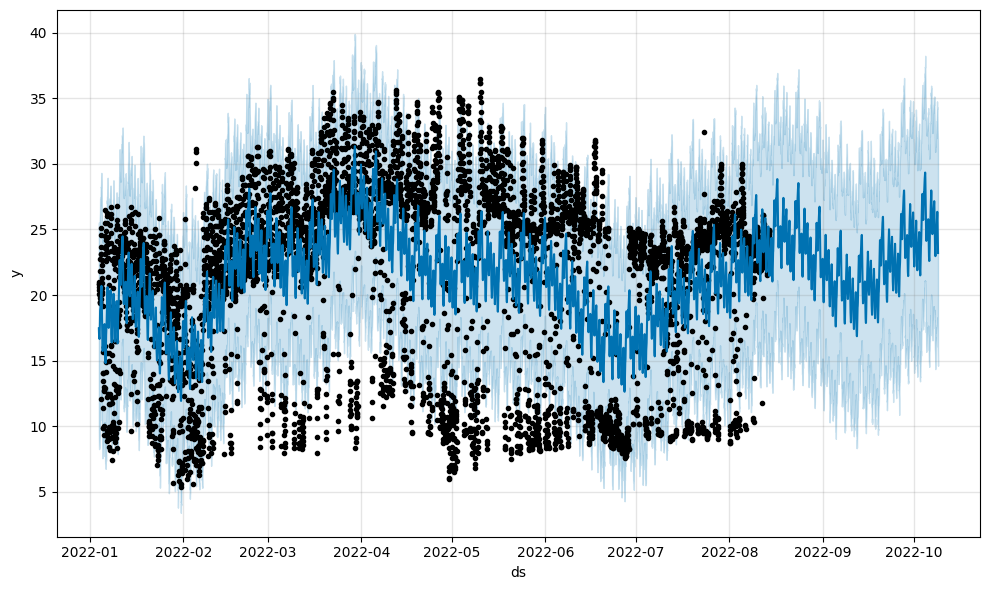

In [107]:

# test set predictions
future = m.make_future_dataframe(periods=len(test_df), freq='H')
forecast = m.predict(future)

fig = m.plot(forecast)
plt.show()

In [108]:
# Extract predictions for the test period
test_forecast = forecast[forecast['ds'].isin(test_df['ds'])]

# Ensure test_df and test_forecast have the same dates
test_df = test_df.merge(test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

In [109]:

# Calculations
y_true = test_df['y'].values
y_pred = test_df['yhat'].values

r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("\nModel Performance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")


Model Performance Metrics:
R-squared: -0.1369
Mean Squared Error: 23.8405
Mean Absolute Error: 3.6691
Root Mean Squared Error: 4.8827


C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\71538\AppData\Roaming\Python\Python312\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


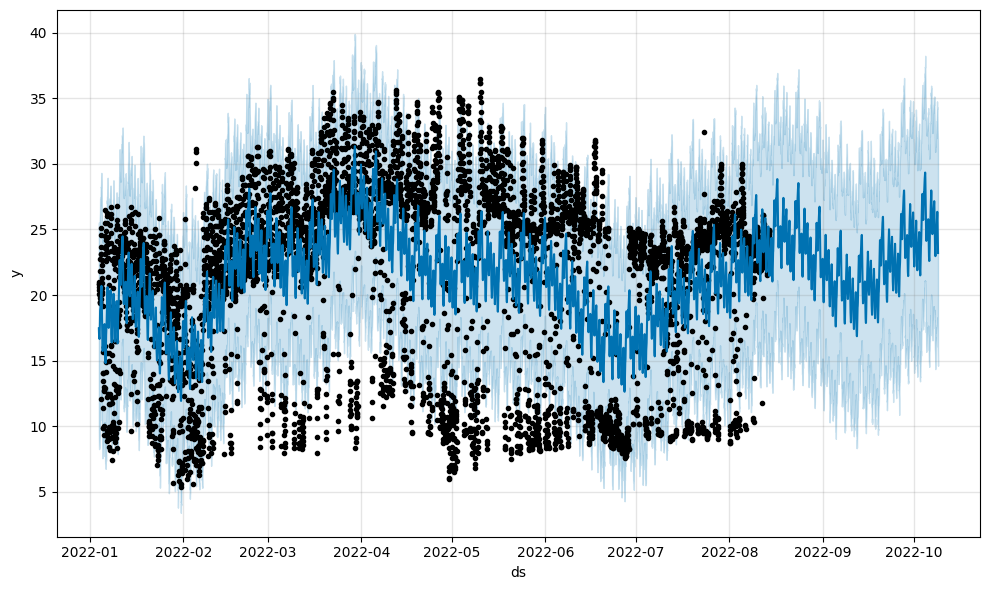

In [110]:

fig = m.plot(forecast)
plt.show()

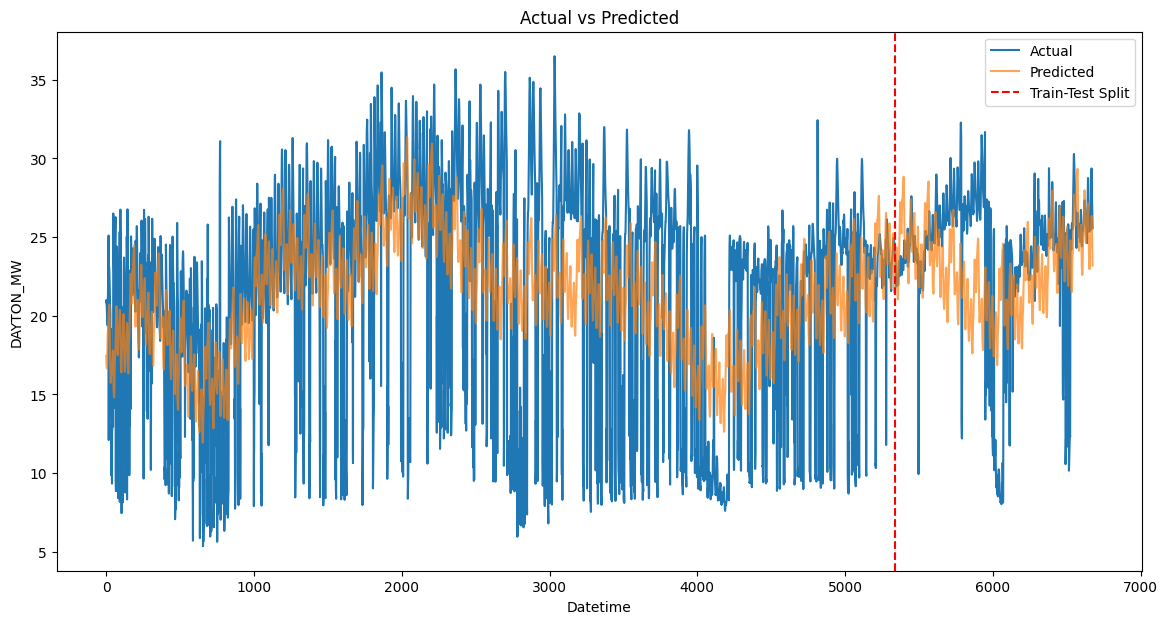

In [117]:
# Plot actual vs predicted with train and test data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['y'], label='Actual')
#plt.plot(train_df.index, train_df['y'], label='Actual')
plt.plot(forecast.index, forecast['yhat'], label='Predicted', alpha=0.7)
plt.axvline(x=train_df.index[-1], color='r', linestyle='--', label='Train-Test Split')
plt.title('Actual vs Predicted')
plt.xlabel('Datetime')
plt.ylabel('DAYTON_MW')
plt.legend()
plt.show()

In [116]:
# Calculations
y_true = df['y'].values
y_pred = forecast['yhat'].values

r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("\nModel Performance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")


Model Performance Metrics:
R-squared: 0.2151
Mean Squared Error: 36.8287
Mean Absolute Error: 4.8711
Root Mean Squared Error: 6.0687
